### Simulate Spatial System

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
def simulate_X(neighbor, num_points1, num_points2):
    np.random.seed(26)
    locations1 = np.random.rand(num_points1, 2) * 100
    locations2 = np.random.rand(num_points2, 2) * 100

    s1 = np.random.normal(50, 10, num_points1)
    # s2 = np.ones(num_points2) 
    s2 = np.random.normal(100, 50, num_points2)
    

    nbrs = NearestNeighbors(n_neighbors=neighbor).fit(locations2)
    distances, indices = nbrs.kneighbors(locations1)

    smoothed_s2 = np.zeros(num_points1)

    for i, neighbors in enumerate(indices):
        weights = np.exp(-distances[i] / np.max(distances[i]))
        smoothed_s2[i] = np.sum(s2[neighbors] * weights) / np.sum(weights)
    return smoothed_s2, locations1

X, loc1 = simulate_X(10, 100, 150) # use a neighbor of 10. Would see if model can recover this too. 

In [3]:
print(len(X))

100


In [4]:
print(X[:5])

[123.52798085 105.10624026  83.62942435 133.86956433  79.60390359]


In [5]:
def create_surface(locations):
    """Function to create spatially varying surface with a gradient pattern increasing linearly from 
        bottom left to the top right
    """
    x = locations[:, 0]
    y = locations[:, 1]

    B = x + y

    return B

b1 = create_surface(loc1)

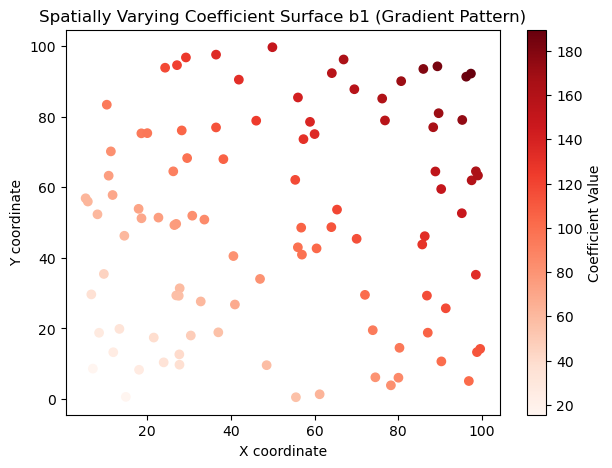

In [6]:
plt.figure(figsize=(7, 5))
plt.scatter(loc1[:, 0], loc1[:, 1], c=b1, cmap='Reds')
plt.colorbar(label='Coefficient Value')
plt.title('Spatially Varying Coefficient Surface b1 (Gradient Pattern)')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

#### Generate y 

In [7]:
y = np.multiply(b1, X)

In [8]:
y 

array([10219.79636401, 16370.49029126,  8852.03619494, 10250.35755537,
        7435.59158442,  8449.10616237,  8956.3419005 ,  6100.97995492,
       22743.18310752,  7493.80990608,  9637.55027454, 10241.85775467,
       19433.80395123,  8308.15630004, 13286.37885618, 15121.12733658,
       17573.34310216,  9822.39660316,  4143.6852312 ,  6983.16867094,
       13573.31370054,  5371.54308387, 22909.7129505 ,  8247.76394758,
       21648.23827714,  3534.74573508,  7805.20668427, 20825.40627087,
        8399.70692145,  6492.32833392,  3745.90826392,  7932.25985438,
       16958.07093365,  9975.1910236 , 19602.04550574, 13662.19260675,
        7409.20158331, 14103.18584303,  6819.17548923,  8098.21207849,
       13759.20651216,  7157.41649247, 13559.76017422,  8824.26304471,
        7679.47615261,  4579.79992068,  6965.16507084, 11894.65125579,
        9951.82154224, 10734.31758423,  4719.94272362, 11914.97965737,
        6359.52152768,  3239.59926769, 10558.03663422, 10310.91638378,
      

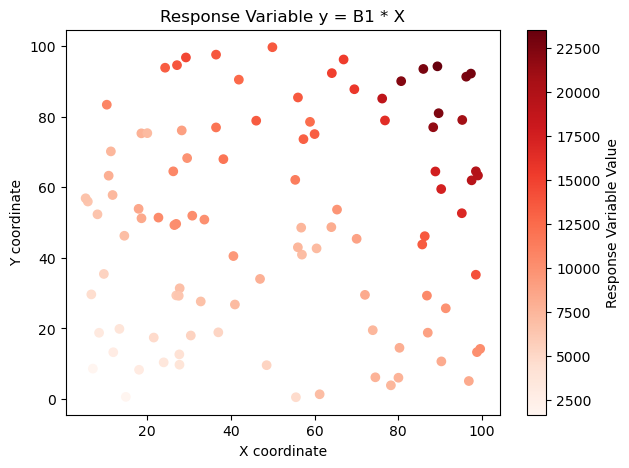

In [9]:
# Plot the response variable y
plt.figure(figsize=(7, 5))
plt.scatter(loc1[:, 0], loc1[:, 1], c=y, cmap='Reds')
plt.colorbar(label='Response Variable Value')
plt.title('Response Variable y = B1 * X')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

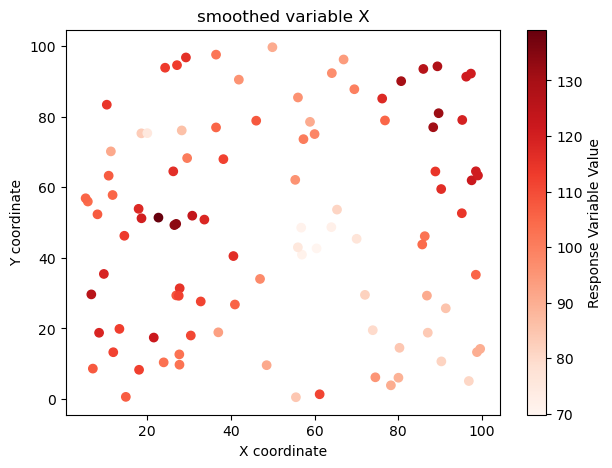

In [10]:
# Plot the smoothed variable X
plt.figure(figsize=(7, 5))
plt.scatter(loc1[:, 0], loc1[:, 1], c=X, cmap='Reds')
plt.colorbar(label='Response Variable Value')
plt.title('smoothed variable X')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()